# **Capstone Project: Machine Learning Foundation Course**
## **Machine Learning Model to Predict the Presence of Heart Disease**
#### Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 
#### Creators: Andras Janosi, M.D. (Hungarian Institute of Cardiology. Budapest), William Steinbrunn, M.D (University Hospital, Zurich, Switzerland), Matthias Pfisterer, M.D. (University Hospital, Basel, Switzerland), Robert Detrano, M.D., Ph.D. (V.A. Medical Center, Long Beach and Cleveland Clinic Foundation)

# **Student Information**
### Student Name: R.A.D. Dinushika Gunasekera
### Registration No: 255
### Date : 15-04-2022

## **Load Python Modules**



In [251]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

# Parameter Serach Methods
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## **Load Data File**

In [252]:
file_path= 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# Load CSV File
data = pd.read_csv(file_path)
data.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


# **Assigning the Column Names**

In [253]:
with open('/content/sample_data/heart-disease.names') as f:
    print(f.read())

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

In [254]:
colum_headers = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data.columns = colum_headers
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [255]:
# to create unique ID
data.index

RangeIndex(start=0, stop=302, step=1)

In [256]:
data['ID'] = data.index
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,ID
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,2
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,3
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,4


In [257]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'ID'],
      dtype='object')

In [258]:
# to rearrange the columns
data = data[['ID', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']]

data.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


# **Data Pre-Processing**

## Analysing the Dataset

In [259]:
# (rows, columns)
data.shape

(302, 15)

In [260]:
# data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        302 non-null    int64  
 1   age       302 non-null    float64
 2   sex       302 non-null    float64
 3   cp        302 non-null    float64
 4   trestbps  302 non-null    float64
 5   chol      302 non-null    float64
 6   fbs       302 non-null    float64
 7   restecg   302 non-null    float64
 8   thalach   302 non-null    float64
 9   exang     302 non-null    float64
 10  oldpeak   302 non-null    float64
 11  slope     302 non-null    float64
 12  ca        302 non-null    object 
 13  thal      302 non-null    object 
 14  num       302 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.5+ KB


In [261]:
data.describe()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,150.500000,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,87.324109,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,75.250000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,150.500000,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,225.750000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,301.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [262]:
# analysing the actual values of the data variable to be predicted, 'num'
data['num'].unique()

array([2, 1, 0, 3, 4])

In [263]:
# num = 0; disease absent
# num = 1, 2, 3, 4; disease present
# Hence introducing reslt = 0; disease absent and reslt  = 1; disease present

data['reslt'] = np.where(data['num']==0,0,1)

In [264]:
data[['num', 'reslt']].sample(10)

,num,reslt
45,0,0
98,0,0
186,2,1
191,1,1
226,0,0
126,3,1
48,0,0
286,0,0
119,3,1
184,0,0


In [265]:
# to check whether balanced data counts are available. If not, need to undersample or oversample
data['reslt'].value_counts()

0    163
1    139
Name: reslt, dtype: int64

In [266]:
# to detect missing values (na)
data[data.isna().any(axis=1)]

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,reslt


In [267]:
# checking for null
data.isnull().sum()

ID          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
reslt       0
dtype: int64

In [268]:
# to detect missing values (?)
data.isin(['?']).value_counts()

ID     age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   num    reslt
False  False  False  False  False     False  False  False    False    False  False    False  False  False  False  False    296
                                                                                             True   False  False  False      4
                                                                                             False  True   False  False      2
dtype: int64

In [269]:
# to obtain specific missing values related rows (ca - 4 rows, thal - 2 rows)
data[data.values == '?']

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,reslt
86,86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0,0
165,165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0,0
191,191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1,1
265,265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2,1
286,286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0,0
301,301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0,0


In [270]:
# analys the data values in column 'ca'
data['ca'].value_counts()

0.0    175
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [271]:
# analys the data values in column 'thal'
data['thal'].value_counts()

3.0    166
7.0    117
6.0     17
?        2
Name: thal, dtype: int64

## Data Visualization

In [272]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

data2 = data.copy()

def func1(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
data2['sex'] = data2['sex'].apply(func1)

def func2(prob):
    if prob == 0:
        return 'No Heart Disease'
    else:
        return 'Heart Disease'
data2['reslt'] = data2['reslt'].apply(func2)

Text(0.5, 1.0, 'Gender vs Result\n')

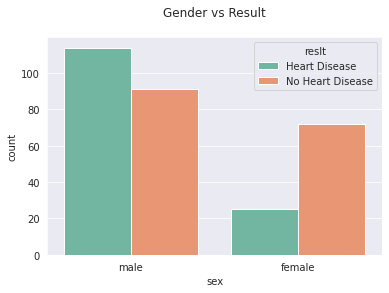

In [273]:
# count plots
sns.countplot(data= data2, x='sex',hue='reslt')
plt.title('Gender vs Result\n')

Text(0.5, 1.0, 'Chest Pain Type vs Result\n')

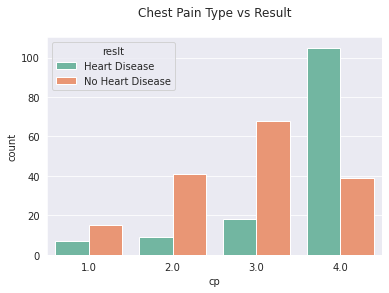

In [274]:
sns.countplot(data= data2, x='cp',hue='reslt')
plt.title('Chest Pain Type vs Result\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

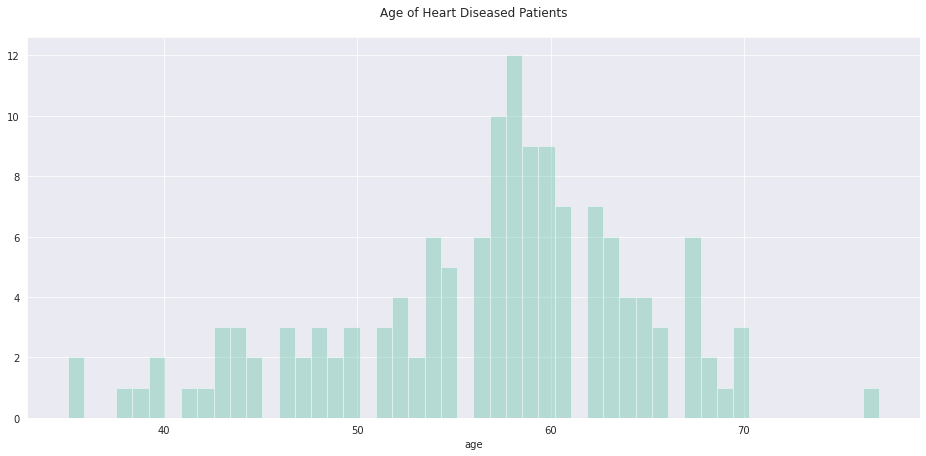

In [275]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['reslt']==1]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholesterol Level of Heart Diseased Patients\n')

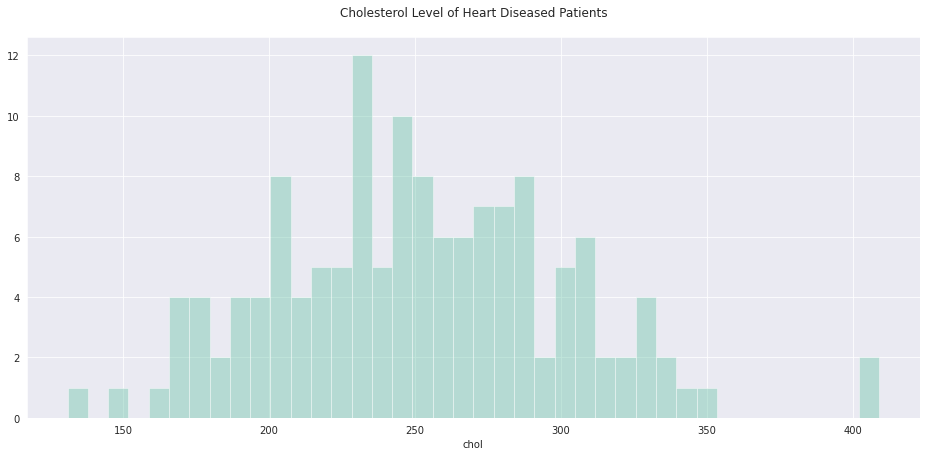

In [276]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['reslt']==1]['chol'],kde=False,bins=40)
plt.title('Cholesterol Level of Heart Diseased Patients\n')

## Treating Missing Values

In [277]:
# dropping the rows with missing values
data.drop(labels=[86, 165, 191, 265, 286, 301], axis=0, inplace=True)

In [278]:
# validating
data.isin(['?']).value_counts()

ID     age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   num    reslt
False  False  False  False  False     False  False  False    False    False  False    False  False  False  False  False    296
dtype: int64

In [279]:
# checking the reslt counts after dropping the rows
data['reslt'].value_counts()

0    159
1    137
Name: reslt, dtype: int64

## Data Transformation

In [280]:
# no categorical data types to transform to numerical
# converting 'ca' and 'thal' datatypes to int64 due to the removal of '?'

data['ca'] = pd.to_numeric(data['ca'])
data['thal'] = pd.to_numeric(data['thal'])

In [281]:
data.dtypes

ID            int64
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
reslt         int64
dtype: object

## Data Behaviors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f659b4f72d0>,
      dtype=object)

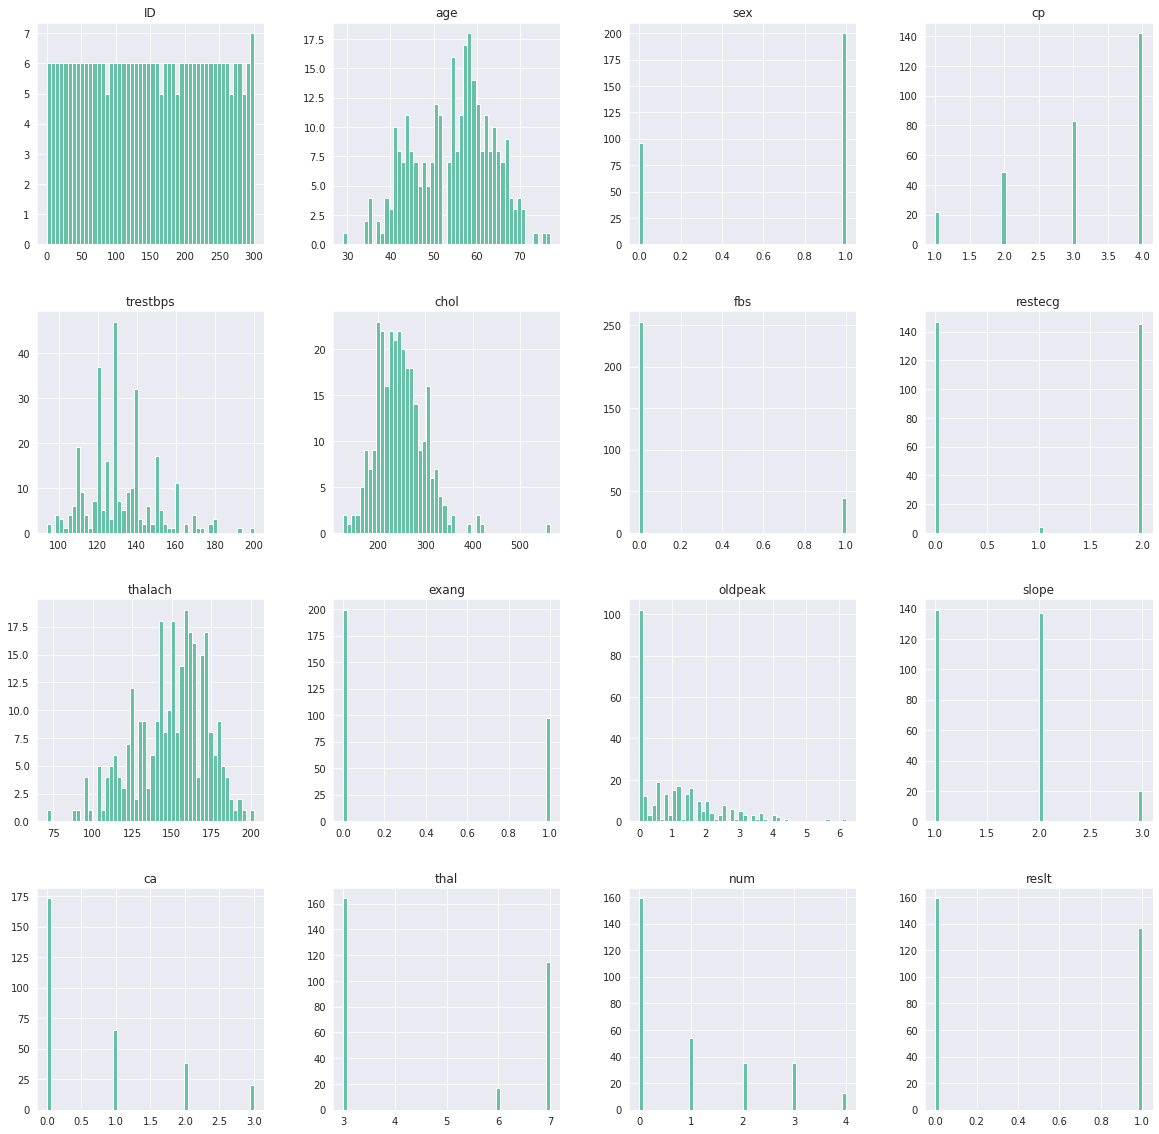

In [282]:
data.hist(bins=50, figsize=(20, 20))

In [283]:
data.skew()

ID          0.008579
age        -0.213636
sex        -0.754384
cp         -0.848906
trestbps    0.707108
chol        1.113923
fbs         2.063022
restecg     0.013582
thalach    -0.535468
exang       0.737900
oldpeak     1.259037
slope       0.506097
ca          1.174624
thal        0.253619
num         1.041658
reslt       0.149821
dtype: float64

##### Skew is between -1 to 1. Anything more beyond this range is skewd. chol, fbs, oldpeak, ca, num are skewed 

## Finding Outliers

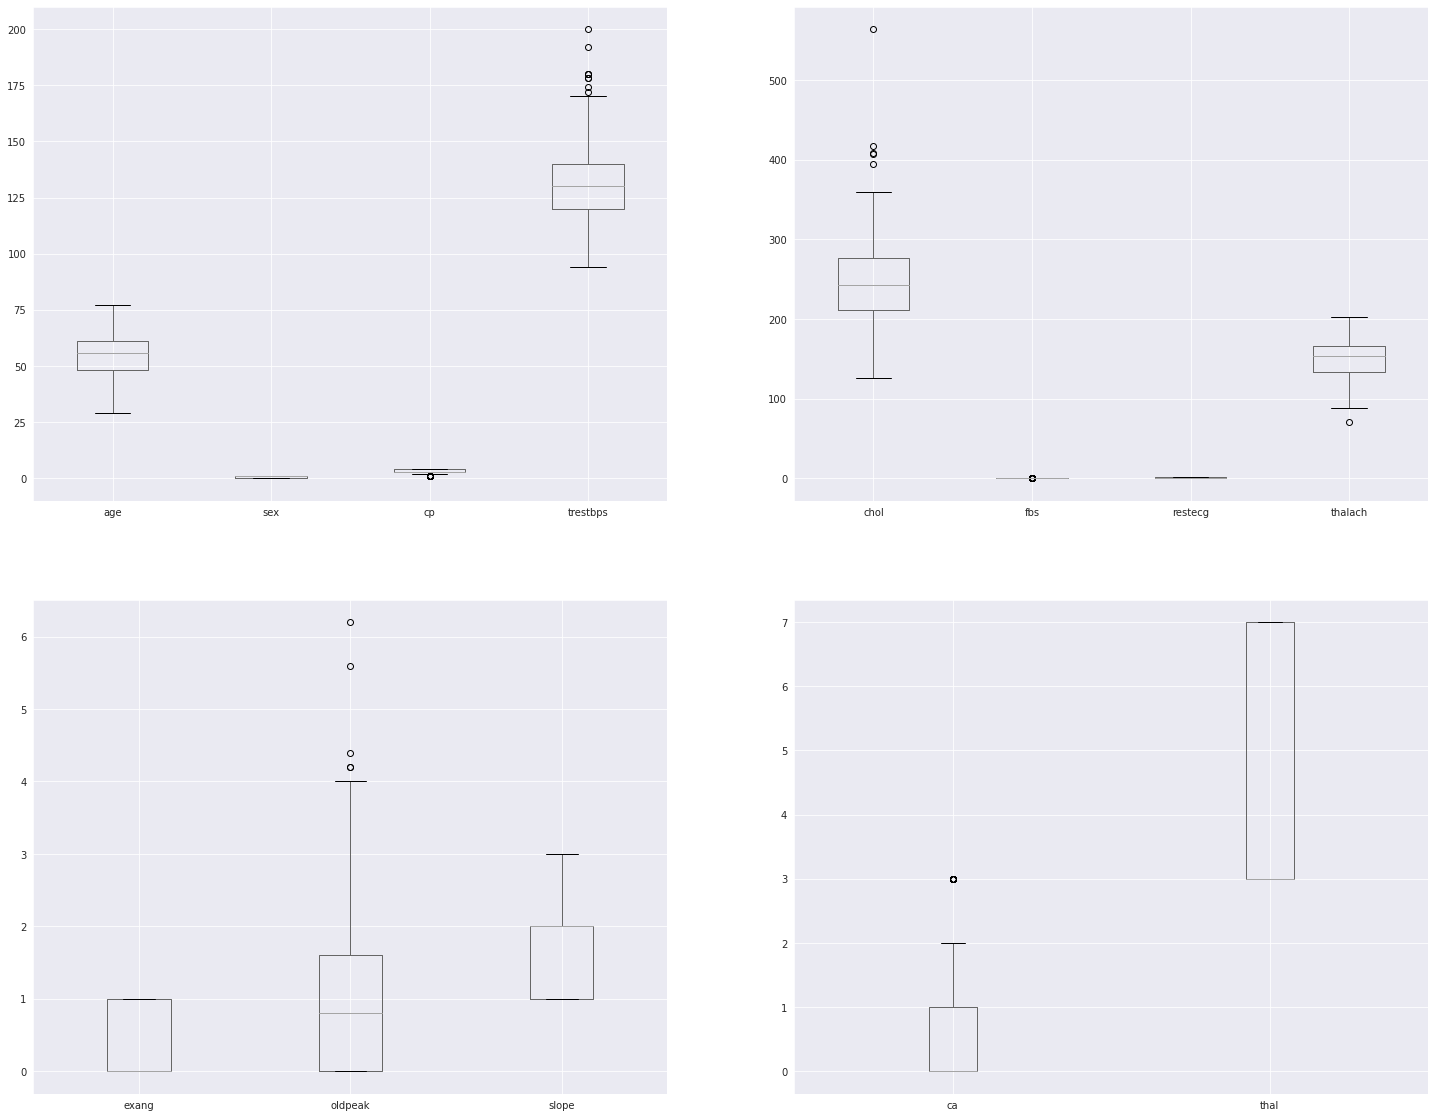

In [284]:
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
data.boxplot(column=['age', 'sex', 'cp', 'trestbps'], ax=ax[0, 0])
data.boxplot(column=['chol', 'fbs', 'restecg', 'thalach' ], ax=ax[0, 1])
data.boxplot(column=['exang', 'oldpeak', 'slope'], ax=ax[1, 0])
data.boxplot(column=['ca', 'thal'], ax=ax[1, 1])

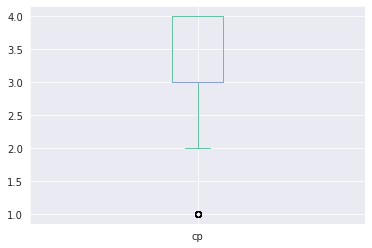

In [285]:
# to get individual plots
data['cp'].plot(kind='box')

#### Outliers are available in: cp, trestbps, chol, fbs, thalach, oldpeak and ca 



In [286]:
# For cp

# 1st quartile
q1 = np.quantile(data['cp'], 0.25)
 
# 3rd quartile
q3 = np.quantile(data['cp'], 0.75)

iqr = q3-q1
 
# upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = data['cp'][(data['cp'] < lower_bound) | (data['cp']> upper_bound)]

print(F"IQR is: {iqr}")
print(F"Upper bound is: {upper_bound}")
print(F"Lower bound is: {lower_bound}")
print(F"The following are the outliers in the boxplot: \n {outliers}")

IQR is: 1.0
Upper bound is: 5.5
Lower bound is: 1.5
The following are the outliers in the boxplot: 
 19     1.0
20     1.0
26     1.0
29     1.0
40     1.0
58     1.0
100    1.0
111    1.0
123    1.0
140    1.0
149    1.0
181    1.0
182    1.0
195    1.0
198    1.0
210    1.0
214    1.0
242    1.0
261    1.0
273    1.0
274    1.0
297    1.0
Name: cp, dtype: float64


In [287]:
# For trestbps

# 1st quartile
q1 = np.quantile(data['trestbps'], 0.25)
 
# 3rd quartile
q3 = np.quantile(data['trestbps'], 0.75)

iqr = q3-q1
 
# upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = data['trestbps'][(data['trestbps'] < lower_bound) | (data['trestbps']> upper_bound)]

print(F"IQR is: {iqr}")
print(F"Upper bound is: {upper_bound}")
print(F"Lower bound is: {lower_bound}")
print(F"The following are the outliers in the boxplot: \n {outliers}")

IQR is: 20.0
Upper bound is: 170.0
Lower bound is: 90.0
The following are the outliers in the boxplot: 
 13     172.0
82     180.0
125    200.0
171    174.0
182    178.0
187    192.0
200    180.0
212    178.0
230    180.0
Name: trestbps, dtype: float64


In [288]:
# For chol

# 1st quartile
q1 = np.quantile(data['chol'], 0.25)
 
# 3rd quartile
q3 = np.quantile(data['chol'], 0.75)

iqr = q3-q1
 
# upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = data['chol'][(data['chol'] < lower_bound) | (data['chol']> upper_bound)]

print(F"IQR is: {iqr}")
print(F"Upper bound is: {upper_bound}")
print(F"Lower bound is: {lower_bound}")
print(F"The following are the outliers in the boxplot: \n {outliers}")

IQR is: 65.25
Upper bound is: 374.125
Lower bound is: 113.125
The following are the outliers in the boxplot: 
 47     417.0
120    407.0
151    564.0
172    394.0
180    409.0
Name: chol, dtype: float64


In [289]:
# For fbs

# 1st quartile
q1 = np.quantile(data['fbs'], 0.25)
 
# 3rd quartile
q3 = np.quantile(data['fbs'], 0.75)

iqr = q3-q1
 
# upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = data['fbs'][(data['fbs'] < lower_bound) | (data['fbs']> upper_bound)]

print(F"IQR is: {iqr}")
print(F"Upper bound is: {upper_bound}")
print(F"Lower bound is: {lower_bound}")
print(F"The following are the outliers in the boxplot: \n {outliers}")

IQR is: 0.0
Upper bound is: 0.0
Lower bound is: 0.0
The following are the outliers in the boxplot: 
 8      1.0
11     1.0
13     1.0
20     1.0
30     1.0
38     1.0
42     1.0
47     1.0
48     1.0
62     1.0
70     1.0
82     1.0
102    1.0
110    1.0
112    1.0
115    1.0
117    1.0
119    1.0
123    1.0
125    1.0
138    1.0
141    1.0
145    1.0
149    1.0
159    1.0
163    1.0
166    1.0
175    1.0
178    1.0
185    1.0
192    1.0
195    1.0
201    1.0
212    1.0
235    1.0
243    1.0
248    1.0
260    1.0
266    1.0
285    1.0
295    1.0
298    1.0
Name: fbs, dtype: float64


In [290]:
# For thalach

# 1st quartile
q1 = np.quantile(data['thalach'], 0.25)
 
# 3rd quartile
q3 = np.quantile(data['thalach'], 0.75)

iqr = q3-q1
 
# upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = data['thalach'][(data['thalach'] < lower_bound) | (data['thalach']> upper_bound)]

print(F"IQR is: {iqr}")
print(F"Upper bound is: {upper_bound}")
print(F"Lower bound is: {lower_bound}")
print(F"The following are the outliers in the boxplot: \n {outliers}")

IQR is: 33.0
Upper bound is: 215.5
Lower bound is: 83.5
The following are the outliers in the boxplot: 
 244    71.0
Name: thalach, dtype: float64


In [291]:
# For oldpeak

# 1st quartile
q1 = np.quantile(data['oldpeak'], 0.25)
 
# 3rd quartile
q3 = np.quantile(data['oldpeak'], 0.75)

iqr = q3-q1
 
# upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = data['oldpeak'][(data['oldpeak'] < lower_bound) | (data['oldpeak']> upper_bound)]

print(F"IQR is: {iqr}")
print(F"Upper bound is: {upper_bound}")
print(F"Lower bound is: {lower_bound}")
print(F"The following are the outliers in the boxplot: \n {outliers}")

IQR is: 1.6
Upper bound is: 4.0
Lower bound is: -2.4000000000000004
The following are the outliers in the boxplot: 
 90     6.2
122    5.6
182    4.2
190    4.2
284    4.4
Name: oldpeak, dtype: float64


In [292]:
# For ca

# 1st quartile
q1 = np.quantile(data['ca'], 0.25)
 
# 3rd quartile
q3 = np.quantile(data['ca'], 0.75)

iqr = q3-q1
 
# upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = data['ca'][(data['ca'] < lower_bound) | (data['ca']> upper_bound)]

print(F"IQR is: {iqr}")
print(F"Upper bound is: {upper_bound}")
print(F"Lower bound is: {lower_bound}")
print(F"The following are the outliers in the boxplot: \n {outliers}")

IQR is: 1.0
Upper bound is: 2.5
Lower bound is: -1.5
The following are the outliers in the boxplot: 
 0      3.0
39     3.0
61     3.0
90     3.0
91     3.0
103    3.0
117    3.0
120    3.0
145    3.0
154    3.0
160    3.0
175    3.0
178    3.0
186    3.0
188    3.0
190    3.0
192    3.0
204    3.0
231    3.0
284    3.0
Name: ca, dtype: float64


## Treating Outliers

### Method: Droping the rows

In [293]:
# cp 
data.drop([19, 20, 26, 29, 40, 58, 100, 111, 123, 140, 149, 181, 182, 195, 198, 210, 214, 242, 261, 273, 274, 297], axis=0, inplace=True)

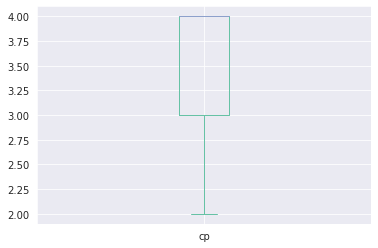

In [294]:
data['cp'].plot(kind='box')

In [295]:
# trestbps
data.drop([13, 82, 125, 171, 187, 200, 212, 230], axis=0, inplace=True)

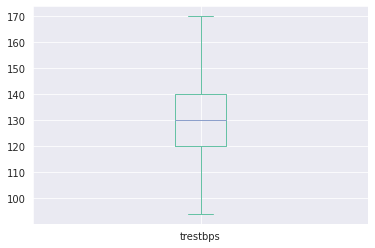

In [296]:
data['trestbps'].plot(kind='box')

In [297]:
# chol
data.drop([47, 120, 151, 172, 180], axis=0, inplace=True)

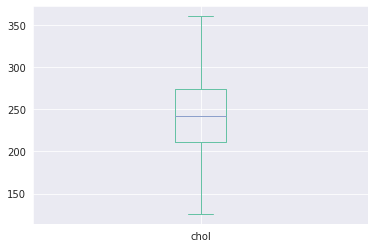

In [298]:
data['chol'].plot(kind='box')

In [299]:
# thalach
data.drop([244], axis=0, inplace=True)

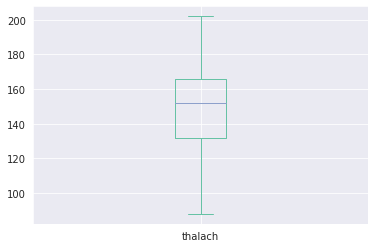

In [300]:
data['thalach'].plot(kind='box')

In [301]:
# oldpeak
data.drop([90, 122, 190, 284], axis=0, inplace=True)

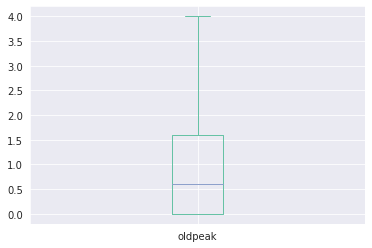

In [302]:
data['oldpeak'].plot(kind='box')

In [303]:
# ca
data.drop([0, 39, 61, 91, 103, 117, 145, 154, 160, 175, 178, 186, 188, 192, 204, 231], axis=0, inplace=True)

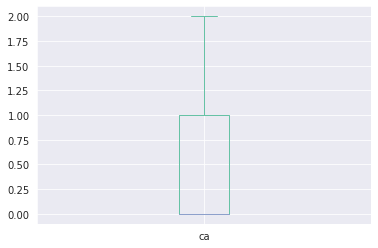

In [304]:
data['ca'].plot(kind='box')

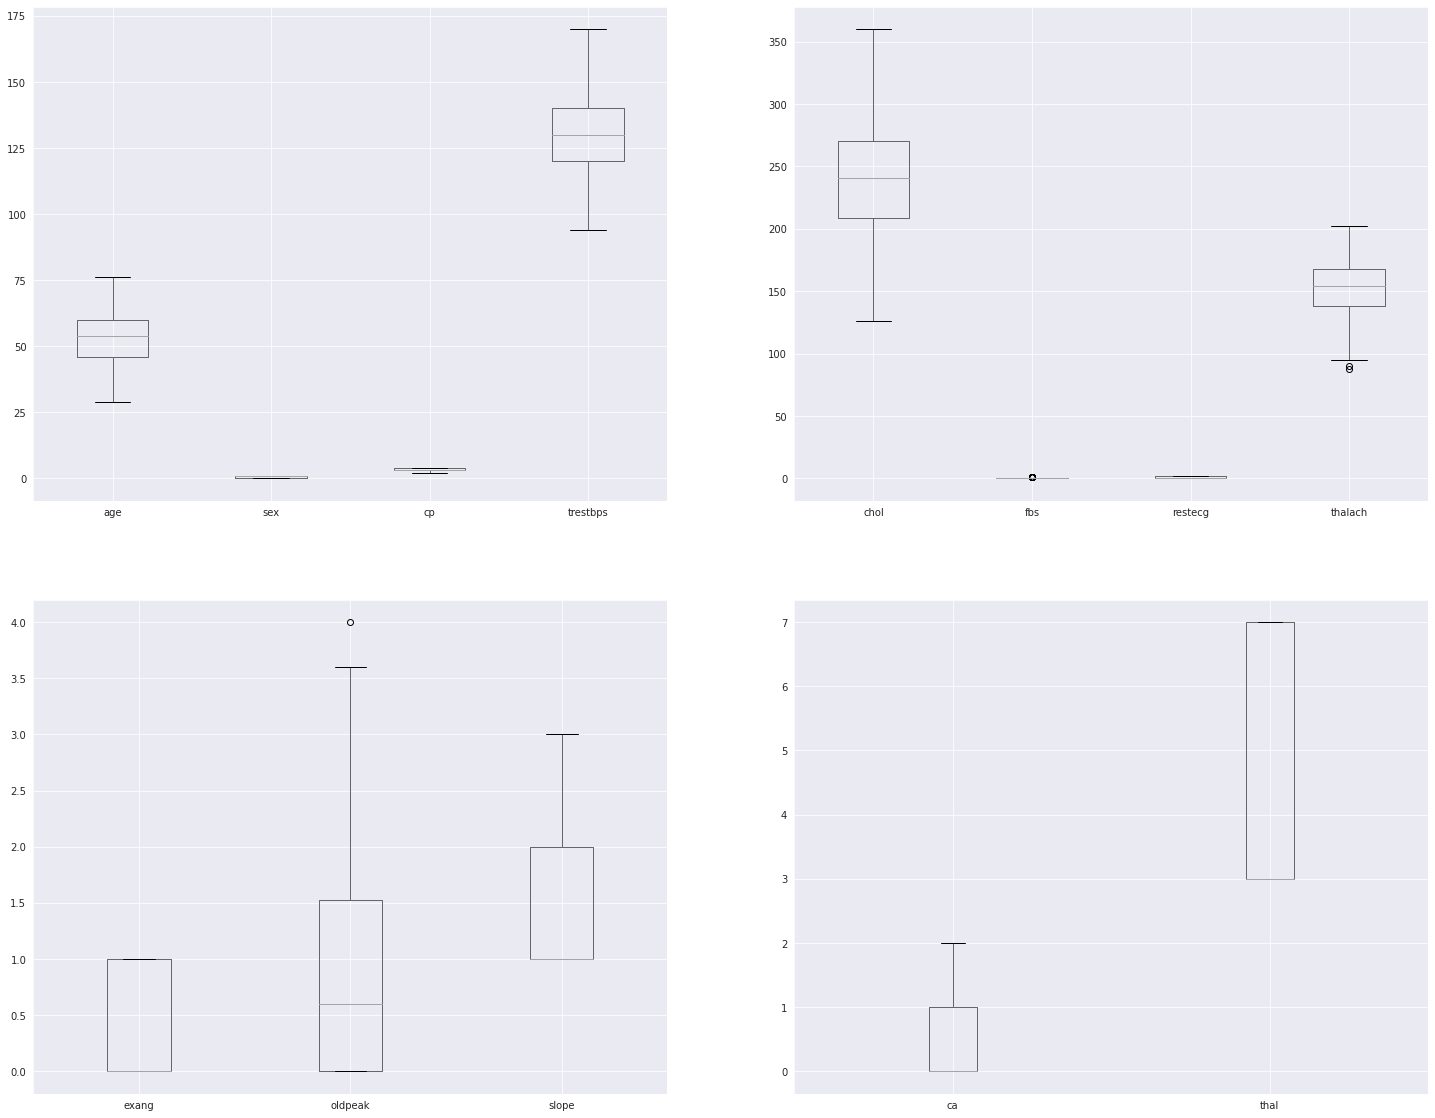

In [305]:
# rechecking for outliers

fig, ax = plt.subplots(2, 2, figsize=(25, 20))
data.boxplot(column=['age', 'sex', 'cp', 'trestbps'], ax=ax[0, 0])
data.boxplot(column=['chol', 'fbs', 'restecg', 'thalach' ], ax=ax[0, 1])
data.boxplot(column=['exang', 'oldpeak', 'slope'], ax=ax[1, 0])
data.boxplot(column=['ca', 'thal'], ax=ax[1, 1])

In [306]:
# For thalach

# 1st quartile
q1 = np.quantile(data['thalach'], 0.25)
 
# 3rd quartile
q3 = np.quantile(data['thalach'], 0.75)

iqr = q3-q1
 
# upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = data['thalach'][(data['thalach'] < lower_bound) | (data['thalach']> upper_bound)]

print(F"IQR is: {iqr}")
print(F"Upper bound is: {upper_bound}")
print(F"Lower bound is: {lower_bound}")
print(F"The following are the outliers in the boxplot: \n {outliers}")

IQR is: 30.25
Upper bound is: 213.375
Lower bound is: 92.375
The following are the outliers in the boxplot: 
 174    88.0
295    90.0
Name: thalach, dtype: float64


In [307]:
data.drop([174, 295], axis=0, inplace=True)

In [308]:
# For oldpeak

# 1st quartile
q1 = np.quantile(data['oldpeak'], 0.25)
 
# 3rd quartile
q3 = np.quantile(data['oldpeak'], 0.75)

iqr = q3-q1
 
# upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = data['oldpeak'][(data['oldpeak'] < lower_bound) | (data['oldpeak']> upper_bound)]

print(F"IQR is: {iqr}")
print(F"Upper bound is: {upper_bound}")
print(F"Lower bound is: {lower_bound}")
print(F"The following are the outliers in the boxplot: \n {outliers}")

IQR is: 1.5750000000000002
Upper bound is: 3.9375000000000004
Lower bound is: -2.3625000000000003
The following are the outliers in the boxplot: 
 292    4.0
Name: oldpeak, dtype: float64


In [309]:
data.drop([292], axis=0, inplace=True)

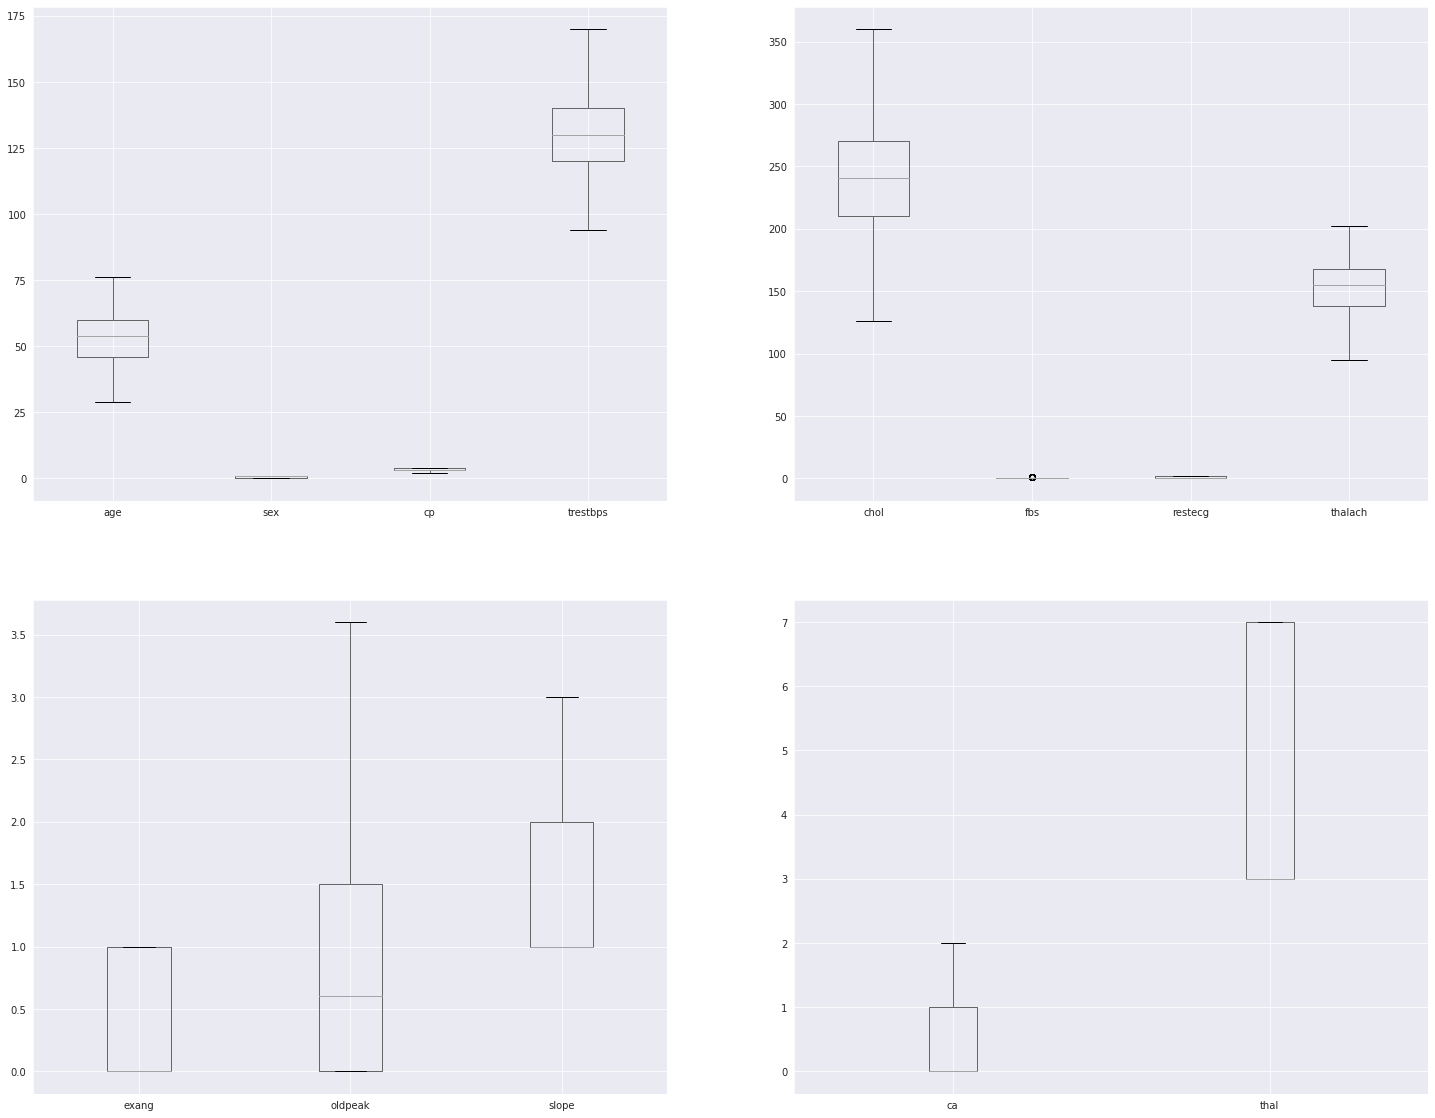

In [310]:
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
data.boxplot(column=['age', 'sex', 'cp', 'trestbps'], ax=ax[0, 0])
data.boxplot(column=['chol', 'fbs', 'restecg', 'thalach' ], ax=ax[0, 1])
data.boxplot(column=['exang', 'oldpeak', 'slope'], ax=ax[1, 0])
data.boxplot(column=['ca', 'thal'], ax=ax[1, 1])

In [311]:
# checking the restl counts after dropping the rows
data['reslt'].value_counts()

0    136
1    101
Name: reslt, dtype: int64

#### As the reslt value counts are fairly balanced, need not to versample or undersample

In [312]:
data.shape

(237, 16)

## Checking the Correlation

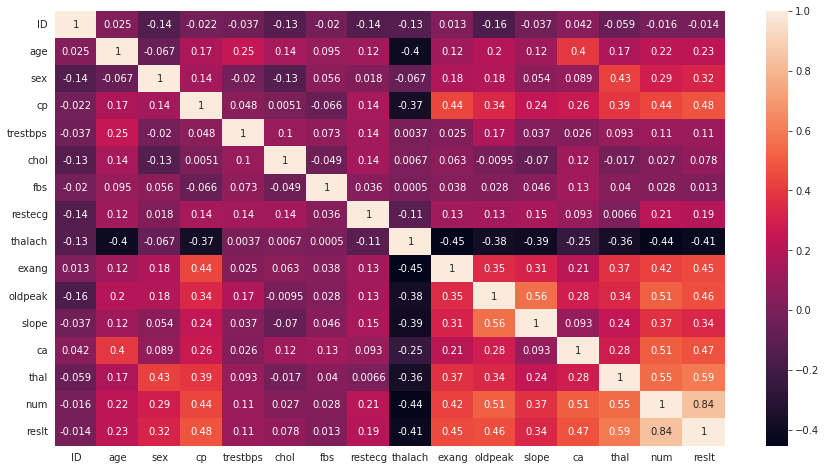

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,reslt
ID,1.000000,0.024505,-0.141722,-0.022154,-0.037225,-0.126234,-0.019977,-0.137862,-0.125767,0.013159,-0.159858,-0.037093,0.041617,-0.059394,-0.015907,-0.013738
age,0.024505,1.000000,-0.066848,0.167488,0.248770,0.142795,0.095498,0.122351,-0.403764,0.124884,0.197961,0.116631,0.397739,0.170413,0.219499,0.225197
sex,-0.141722,-0.066848,1.000000,0.138318,-0.019589,-0.134393,0.056344,0.018014,-0.067441,0.178988,0.183390,0.054296,0.089082,0.426454,0.293363,0.319765
cp,-0.022154,0.167488,0.138318,1.000000,0.048353,0.005085,-0.066027,0.144170,-0.368598,0.440916,0.337110,0.241462,0.262179,0.387359,0.442199,0.479012
trestbps,-0.037225,0.248770,-0.019589,0.048353,1.000000,0.100424,0.072665,0.136285,0.003743,0.025440,0.174139,0.037248,0.026240,0.092861,0.108419,0.106982
chol,-0.126234,0.142795,-0.134393,0.005085,0.100424,1.000000,-0.049124,0.138371,0.006748,0.062782,-0.009462,-0.070484,0.117486,-0.017437,0.027338,0.077700
fbs,-0.019977,0.095498,0.056344,-0.066027,0.072665,-0.049124,1.000000,0.036200,0.000505,0.038178,0.027997,0.045610,0.125958,0.040339,0.027984,0.013258
restecg,-0.137862,0.122351,0.018014,0.144170,0.136285,0.138371,0.036200,1.000000,-0.109260,0.125631,0.134770,0.149558,0.092997,0.006617,0.210689,0.192260
thalach,-0.125767,-0.403764,-0.067441,-0.368598,0.003743,0.006748,0.000505,-0.109260,1.000000,-0.453545,-0.381029,-0.391297,-0.245391,-0.364128,-0.441414,-0.412157
exang,0.013159,0.124884,0.178988,0.440916,0.025440,0.062782,0.038178,0.125631,-0.453545,1.000000,0.347751,0.313952,0.211836,0.374746,0.417204,0.449927


In [313]:
correlation_matrix = data.corr()

plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()
correlation_matrix

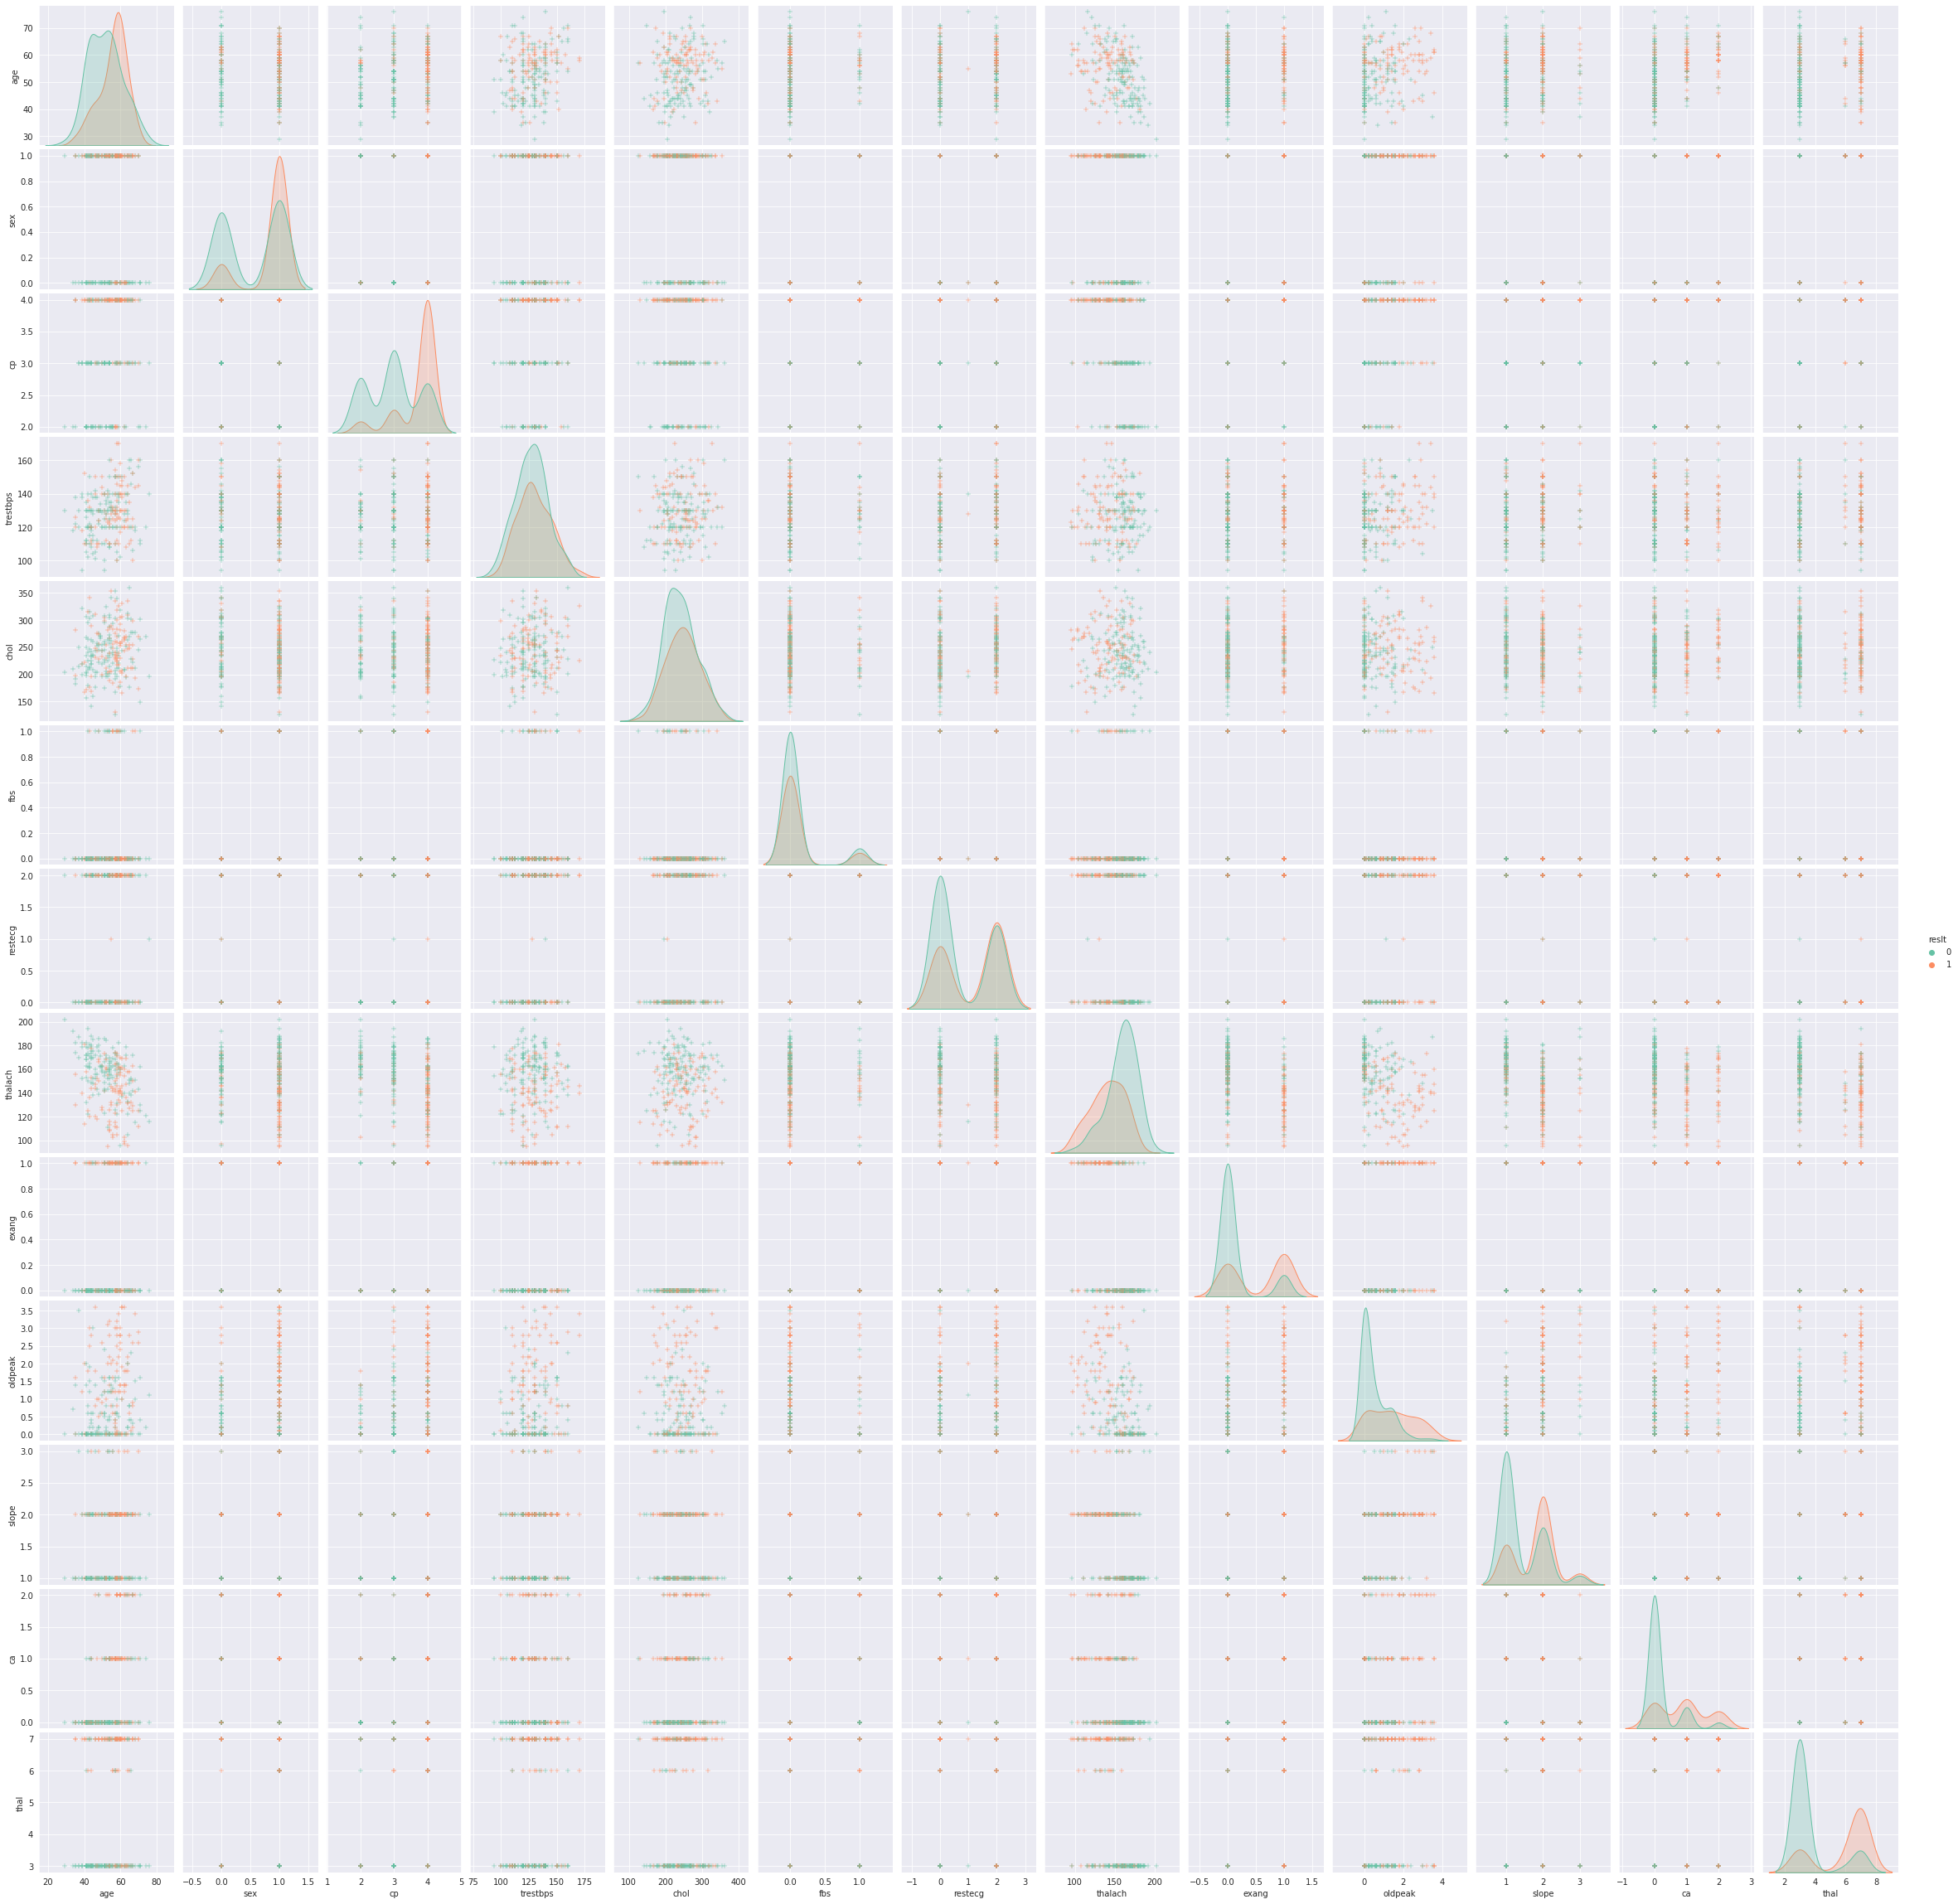

In [314]:
Selected = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'reslt' ]

sns.pairplot(data=data[Selected], hue='reslt', markers='+')
plt.show()

## Feature Selection

In [315]:
# selecting x and y variables
X_variables = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
y_variable = 'reslt'

print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_variables = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
y_variable = reslt


In [316]:
X = data[X_variables].values
y = data[y_variable].values

## Test Train Split

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 165
Test sample size  = 72


# **Model Building**

In [318]:
# function to train the model

def model_train(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    recall = metrics.recall_score(test_result['y_act'], test_result['y_pred'], average='weighted')
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  
    roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

    

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'recall':recall,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  'y act': y_test,
                  'y pred': y_pred
                  })

In [319]:
# model evaluation

models = []
models.append(model_train(LogisticRegression(n_jobs=3, random_state = 0), 'LGR', X_train, y_train, X_test, y_test))
models.append(model_train(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), 'KNC', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0), 'RF', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(criterion = 'gini', random_state = 0 ), 'DT-G', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(criterion = 'entropy', random_state = 0 ), 'DT-En', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models

,model_name,model,accuracy,precision,recall,f1_score,roc_auc,y act,y pred
0,LGR,"LogisticRegression(n_jobs=3, random_state=0)",0.902778,0.914286,0.902778,0.902759,0.925154,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...","[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ..."
1,KNC,KNeighborsClassifier(),0.652778,0.677419,0.652778,0.651095,0.743441,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, ..."
2,RF,"(DecisionTreeClassifier(criterion='entropy', m...",0.819444,0.870968,0.819444,0.818569,0.926312,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...","[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, ..."
3,DT-G,DecisionTreeClassifier(random_state=0),0.805556,0.805556,0.805556,0.805556,0.805556,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...","[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ..."
4,DT-En,"DecisionTreeClassifier(criterion='entropy', ra...",0.805556,0.823529,0.805556,0.805405,0.805556,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...","[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ..."


## Individual Model Building

### Logistic Regression

In [320]:
# Create model object
model = LogisticRegression()

# Train Model
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [321]:
# Predict Probability -use the test data set
model.predict_proba(X_test)[:5]

array([[0.67649488, 0.32350512],
       [0.95285132, 0.04714868],
       [0.92850263, 0.07149737],
       [0.07341359, 0.92658641],
       [0.08199531, 0.91800469]])

In [322]:
# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

,y_act,y_pred,y_pred_prob
13,0,0,0.054307
23,1,1,0.971681
37,0,0,0.216737
34,0,1,0.821086
2,0,0,0.071497


In [323]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,33,3,36
1,4,32,36
All,37,35,72


In [324]:
# Accuracy
accuracy_lgr = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
print(F"accuracy_lgr = {accuracy_lgr}")

# Precision
precision_lgr = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
print(F"Precision_lgr = {precision_lgr}")

# Recall
recall_lgr = metrics.recall_score(test_result['y_act'], test_result['y_pred'], average='weighted') #weighted accounts for label imbalance.
print(F"Recall_lgr = {recall_lgr}")

# F1 score
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
print(F"F1 score_lgr = {f1_score_lgr}")

accuracy_lgr = 0.9027777777777778
Precision_lgr = 0.9142857142857143
Recall_lgr = 0.9027777777777778
F1 score_lgr = 0.9027590198726606


In [325]:
# classification report - this gives the full report of the performance 
from sklearn.metrics import classification_report  
print("classification_report:\n",classification_report(test_result['y_act'], test_result['y_pred']))

classification_report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.91      0.89      0.90        36

    accuracy                           0.90        72
   macro avg       0.90      0.90      0.90        72
weighted avg       0.90      0.90      0.90        72



In [326]:
# Feature importance/Coefficients
features_to_model = X_variables
coefficients = model.coef_[0]
intercept = model.intercept_[0]
feature_profile = pd.DataFrame({"feature":features_to_model, "coefficients":coefficients})
print("feature_profile:\n", feature_profile)
print("intercept:", intercept)
print('\n')
print("Model Parameters:\n", pd.Series(model.get_params()))

feature_profile:
      feature  coefficients
0        age     -0.044338
1        sex      0.263018
2         cp      0.464988
3   trestbps     -0.004929
4       chol     -0.002587
5        fbs     -0.207097
6    restecg      0.568586
7    thalach     -0.019090
8      exang      0.412581
9    oldpeak      0.613100
10     slope      0.272710
11        ca      1.256360
12      thal      0.513794
intercept: -0.20367858623351223


Model Parameters:
 C                       1.0
class_weight           None
dual                  False
fit_intercept          True
intercept_scaling         1
l1_ratio               None
max_iter                100
multi_class            auto
n_jobs                 None
penalty                  l2
random_state           None
solver                lbfgs
tol                  0.0001
verbose                   0
warm_start            False
dtype: object


## **Parameter Tunning**

### GridSearchCV

In [327]:
# Define Hyperparameter Grid
param_grid = {'C': [0.1, 0.5, 1, 2, 5, 10]} # only one parameter is given here which is C. also can use functions range or np arrange to define the range
  
# Create model object
model = LogisticRegression()
  
# Create GridSearchCV object
model_cv = GridSearchCV(model, param_grid, cv=5, scoring='f1')  # important: scoring - based on which parameter evaluation should be done
  
model_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(model_cv.best_params_))
print("Best model score: {}".format(model_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Tuned Model Parameters: {'C': 0.5}
Best model score: 0.8003589743589743


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Tuned Model Parameters: {'C': 0.5}

Best model score: 0.8003589743589743

### Get Best Model

In [328]:
model = model_cv.best_estimator_

# Feature importance/Coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]
feature_profile = pd.DataFrame({"feature":features_to_model, "coefficients":coefficients})
print("feature_profile:\n", feature_profile)
print("intercept:", intercept)
print('\n')
print("Model Parameters:\n", pd.Series(model.get_params()))

# Evaluate Model
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]
print(y_pred_prob[:5])

test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
print(test_result.sample(10))
print('\n')


cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
print("Confusion Matrix:\n", cfm)
print('\n')

# Model evaluation
# Accuracy
accuracy_lgr = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
print(F"accuracy_lgr = {accuracy_lgr}")

# Precision
precision_lgr = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
print(F"Precision_lgr = {precision_lgr}")

# Recall
recall_lgr = metrics.recall_score(test_result['y_act'], test_result['y_pred'], average=None) #weighted accounts for label imbalance.
print(F"Recall_lgr = {recall_lgr}")

# F1 score
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average=None)  #weighted accounts for label imbalance.
print(F"F1 score_lgr = {f1_score_lgr}")

from sklearn.metrics import classification_report
print("classification_report:\n",classification_report(test_result['y_act'], test_result['y_pred']))


feature_profile:
      feature  coefficients
0        age     -0.042018
1        sex      0.248411
2         cp      0.495172
3   trestbps     -0.004408
4       chol     -0.001766
5        fbs     -0.210647
6    restecg      0.572224
7    thalach     -0.020723
8      exang      0.384112
9    oldpeak      0.539809
10     slope      0.265267
11        ca      1.084666
12      thal      0.498827
intercept: -0.23550409108957127


Model Parameters:
 C                       0.5
class_weight           None
dual                  False
fit_intercept          True
intercept_scaling         1
l1_ratio               None
max_iter                100
multi_class            auto
n_jobs                 None
penalty                  l2
random_state           None
solver                lbfgs
tol                  0.0001
verbose                   0
warm_start            False
dtype: object
[0.30749907 0.05539059 0.07558183 0.92017208 0.90768762]
    y_act  y_pred  y_pred_prob
21      1       0     0.05897

In [329]:
# Select best model 
model = models.query("model_name=='LGR'")
model 

,model_name,model,accuracy,precision,recall,f1_score,roc_auc,y act,y pred
0,LGR,"LogisticRegression(n_jobs=3, random_state=0)",0.902778,0.914286,0.902778,0.902759,0.925154,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...","[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ..."


In [330]:
#extracting the model name from the dictonery 
model = model['model'].values[0]
model

LogisticRegression(n_jobs=3, random_state=0)

# **Saving the Model**

In [331]:
import pickle

save_file = 'model_LGR.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [332]:
# loading from file
model_ = pickle.load(open(save_file, 'rb'))
model_

LogisticRegression(n_jobs=3, random_state=0)